---------
# 배추가격 예측 AI Project for 모인활

Notes by kjune18@naver.com, Handong Global Univ.

## 기대효과

- 선형 회귀까지만 공부한 사람도 실제로 기상청 등의 데이터에서 다양한 배추 가격 데이터를 수집하고 직접 활용하여 스스로 웹사이트까지 구축해볼 수 있다.
- 결과적으로 사용자의 입력값에 따라 적당한 배추 가격을 예측해주는 모델을 만들고, 모델을 통해 결과를 보여줄 수 있다.

## 포함되는 개념들

1. 파이썬 and Tensorflow에서 학습된 모델을 저장하고 필요에 따라서 불러오는 기능
2. Flask Web Server & Mdbootstrap Design Framework

## 1. 선형 회귀

선형 회귀는 통계학에서 종속 변수 $y$와 한 개 이상의 독립 변수 $x$와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.
선형 회귀는 선형 예측 함수를 사용해 회귀식을 모델링하며, 알려지지 않은 파라미터는 데이터로부터 추정한다. 이렇게 만들어진 회귀식을 선형 모델이라고 한다.

선형 회귀는 여러 사용 사례가 있지만, 대개 아래와 같은 두 가지 분류 중 하나로 요약할 수 있다.
- 값을 예측하는 것이 목적일 경우, 선형 회귀를 사용해 데이터에 적합한 예측 모형을 개발한다. 개발한 선형 회귀식을 사용해 $y$가 없는 $x$값에 대해 $y$를 예측하기 위해 사용할 수 있다.


- 종속 변수 $y$와 이것과 연관된 독립 변수 $X_1$,  ...   ,$X_p$
가 존재하는 경우에, 선형 회귀 분석을 사용해 $X_j$와 $y$의 관계를 정량화할 수 있다.


<img src = "https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png" width=300>
<center>그림 1: 독립변수 1개와 종속변수 1개를 가진 선형 회귀의 예

## 2. 데이터 수집

우리나라 정부에서는 다양한 데이터를 무료로 제공해주고 있다. 그러나, 데이터를 제공하는 정책이 서로 다를 수 있기 때문에 데이터를 수집하는 방법에 있어서는 조금씩 다르게 활용할 필요가 있다.

### 기상청 자료 이용하기

1. 기상자료개방포털(기후통계분석)로 이동한다.
2. 먼저 기온분석으로 이동하여, 원하는 기간과 지역/지점을 선택하고 csv다운로드 버튼을 눌러 데이터를 얻도록 한다.
3. 다음으로 강수량분석으로 이동하여, 앞에서 받은 데이터와 동일한 기간, 동일한 지역/지점을 선택하고 csv다운로드 버튼을 통해 데이터를 얻도록 한다.

### 농산물유통 자료 이용하기

1. 농산물유통정보사이트로 이동한다.
2. 가격정보에서 채소류->배추를 선택하고, 품종과 등급은 전체로 하여 조회한다.
3. 데이터 저장버튼을 통해 데이터를 얻도록 한다.

## 3. 데이터 정제

처음 수집한 data는 인공지능이 인식하기 쉬운 형태는 아니다.
따라서 엑셀 내부의 data를 정제함으로써 인공지능이 인식하기 쉬운 형태로 만들어 줘야 한다.
특히 배추의 가격은 주말 등에는 측정되지 않는 점이 있고, 몇몇 일자에는 가격이 급상승하는 data가 있기 때문에 data의 정제가 반드시 필요하다.

여기에서 사용할 변인은 평균온도, 최저온도, 최고온도, 강수량 총 4가지 변인을 사용하여 가격을 예측하도록 할 것이다.
<img src = "https://t1.daumcdn.net/cfile/tistory/99D710465B7D9A8E18" width= 300>

정제된 data 링크 https://github.com/kjune18/AI-for-All

## 4. 모델 만들기

다변인 선형 회귀는 모델에 영향을 미치는 변인이 여러 개 일때 사용하는 모델이다. 현재 우리의 데이터에서는 변인이 '평균온도', '최저온도', 최고온도', '강수량'이므로 이 모든 요인이 '가격'에 영향을 미친다고 감안해야 한다. 따라서 가중치(Weight)을 고려했을 때 다음과 같은 수식을 세울 수 있다.

$H(x_1, x_2, x_3, x_4) = x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4$

파이썬에서 Tensorflow 라이브러리를 활용해 다변인 선형 회귀 모델을 구현한다.

In [47]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [66]:
# 엑셀에서 data를 읽어온다.
# pandas library: excel data를 읽어올 수 있다.
import tensorflow.compat.v1 as tf
import numpy as np
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

model = tf.global_variables_initializer()   # model 초기화하기

data = read_csv('price data.csv', sep=',')  # csv파일 읽어오기

xy = np.array(data, dtype=np.float32)    # 행렬 형태로 저장하기

In [67]:
# 4개의 변인을 입력을 받는다.
x_data = xy[:, 1:-1]   # slicing x
print(x_data)
# 가격 값을 입력 받는다.
y_data = xy[:, [-1]]   # slicing y
print(y_data)

[[ -4.9 -11.    0.9   0. ]
 [ -3.1  -5.5   5.5   0.8]
 [ -2.9  -6.9   1.4   0. ]
 ...
 [  2.9  -2.1   8.    0. ]
 [  2.9  -1.6   7.1   0.6]
 [  2.1  -2.    5.8   0.4]]
[[2123.]
 [2123.]
 [2123.]
 ...
 [2901.]
 [2901.]
 [2901.]]


placeholder의 전달 파라미터는 다음과 같다.

placeholder(
    dtype,
    shape=None,
    name=None
)


- dtype : 데이터 타입을 의미하며 반드시 적어주어야 한다.

- shape : 입력 데이터의 형태를 의미한다. 상수 값이 될 수도 있고 다차원 배열의 정보가 들어올 수도 있다. ( 디폴트 파라미터로 None 지정 )

- name : 해당 placeholder의 이름을 부여하는 것으로 적지 않아도 된다.  ( 디폴트 파라미터로 None 지정 )

텐서플로우 random_normal():
0~1 사이의 정규확률분포 값을 생성해주는 함수.  
원하는 shape 대로 만들어줌

In [68]:
# placeholder를 설정한다.
# Tensorflow2에선 생략

X = tf.placeholder(tf.float32, shape=[None, 4])  # 변인 4개
Y = tf.placeholder(tf.float32, shape=[None, 1])  # 변인 1개
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

W(가중치) 값과 b(바이어스) 의 값을 지정해야 하는데 이는 학습을 위해 임의의 값 (아직 잘 모른다고 가정)을 던져준다.

텐서플로우에서는 W와 b에 해당하는 변수를 Variable 을 사용하여 나타낸다. 그리고 텐서 플로우가 알아서 이 값을 자동으로 조절해 줄 것이며 나중에 비용함수가 최소(minimize)가 되는 가중치와 바이어스 값으로 조정하게 된다.

In [69]:
# 가설을 설정한다.
hypothesis = tf.matmul(X, W) + b  # 행렬 곱 연산

In [70]:
# 비용함수를 설정한다.
# mse(mean squared error)
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [71]:
# 최적화 함수를 설정한다. 여기선 GradientDescent(경사하강) 함수 사용
# 학습률 0.000005로 설정한 이유 - 되도록 짧은 시간에 정확한 결과 나오게 하기 위함
# 경사하강의 간격
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

In [72]:
# 세션을 생성한다.
sess = tf.Session()

# 글로벌 변수 초기화시킨다.
sess.run(tf.global_variables_initializer())

In [73]:
# 학습을 수행한다.
ephocs = 100000
for step in range(ephocs):
    costx, hypox, trainx = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 500 == 0:
        print("#", step, " 손실비용: ", costx)
        print("-배추 가격: ", hypox[0])

# 0  손실비용:  12702171.0
-배추 가격:  [1.0223333]
# 500  손실비용:  4198919.5
-배추 가격:  [-279.83792]
# 1000  손실비용:  3791032.8
-배추 가격:  [30.44785]
# 1500  손실비용:  3472610.5
-배추 가격:  [313.15082]
# 2000  손실비용:  3222243.0
-배추 가격:  [564.31134]
# 2500  손실비용:  3024890.5
-배추 가격:  [787.4435]
# 3000  손실비용:  2869069.5
-배추 가격:  [985.7306]
# 3500  손실비용:  2745902.5
-배추 가격:  [1161.9795]
# 4000  손실비용:  2648472.8
-배추 가격:  [1318.6677]
# 4500  손실비용:  2571358.0
-배추 가격:  [1457.9865]
# 5000  손실비용:  2510294.8
-배추 가격:  [1581.874]
# 5500  손실비용:  2461921.2
-배추 가격:  [1692.0518]
# 6000  손실비용:  2423584.2
-배추 가격:  [1790.0427]
# 6500  손실비용:  2393186.8
-배추 가격:  [1877.2002]
# 7000  손실비용:  2369071.0
-배추 가격:  [1954.7269]
# 7500  손실비용:  2349926.2
-배추 가격:  [2023.6893]
# 8000  손실비용:  2334715.0
-배추 가격:  [2085.0352]
# 8500  손실비용:  2322616.8
-배추 가격:  [2139.6084]
# 9000  손실비용:  2312982.0
-배추 가격:  [2188.1572]
# 9500  손실비용:  2305297.0
-배추 가격:  [2231.3472]
# 10000  손실비용:  2299155.5
-배추 가격:  [2269.7717]
# 10500  손실비용:  2294235.0
-배추 가격:  [230

# 88000  손실비용:  2234569.8
-배추 가격:  [2583.6074]
# 88500  손실비용:  2234312.2
-배추 가격:  [2583.6416]
# 89000  손실비용:  2234055.0
-배추 가격:  [2583.6758]
# 89500  손실비용:  2233797.8
-배추 가격:  [2583.7102]
# 90000  손실비용:  2233540.5
-배추 가격:  [2583.7446]
# 90500  손실비용:  2233285.0
-배추 가격:  [2583.7786]
# 91000  손실비용:  2233030.2
-배추 가격:  [2583.8123]
# 91500  손실비용:  2232775.8
-배추 가격:  [2583.8455]
# 92000  손실비용:  2232521.8
-배추 가격:  [2583.8796]
# 92500  손실비용:  2232267.5
-배추 가격:  [2583.9136]
# 93000  손실비용:  2232013.2
-배추 가격:  [2583.9478]
# 93500  손실비용:  2231759.0
-배추 가격:  [2583.9814]
# 94000  손실비용:  2231505.2
-배추 가격:  [2584.0156]
# 94500  손실비용:  2231251.2
-배추 가격:  [2584.0498]
# 95000  손실비용:  2230997.8
-배추 가격:  [2584.0837]
# 95500  손실비용:  2230744.2
-배추 가격:  [2584.1182]
# 96000  손실비용:  2230490.8
-배추 가격:  [2584.152]
# 96500  손실비용:  2230237.5
-배추 가격:  [2584.186]
# 97000  손실비용:  2229984.8
-배추 가격:  [2584.2207]
# 97500  손실비용:  2229731.5
-배추 가격:  [2584.2559]
# 98000  손실비용:  2229478.5
-배추 가격:  [2584.2898]
# 98500  손실비용: 

In [74]:
# 학습된 모델을 저장한다.
saver = tf.train.Saver()
save_path = saver.save(sess, "./saved.cpkt") #tensorflow로 학습시킨 딥러닝 모델을 저장하는 방법, 학습된 모델의 variable을 저장.
print("학습된 모델을 저장했습니다.")

학습된 모델을 저장했습니다.


- 학습모델을 저장하는 이유

만약 학습 모델을 저장하지 않고 사용자로부터 배추 가격 예측 요청(Request)이 발생할 때마다 매 번 학습을 해서 결과를 돌려준다면 시간이 오래 걸리고 많은 리소스가 소모 될 것이다.

  따라서 오프라인(Offline)에서 주기적으로 데이터를 이용해 학습을 진행한 뒤에, 그 결과를 저장해서 서버에서는 실시간 요청에 따라 이미 저장된 학습 모델로 배추 가격을 예측하는 것이 효율적이다.

In [63]:
# Tensorflow Ver1.
# 엑셀에서 data를 읽어온다.
# pandas library: excel data를 읽어올 수 있다.
import tensorflow.compat.v1 as tf
import numpy as np
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

data = read_csv('price data.csv', sep=',')  # csv파일 읽어오기

xy = np.array(data, dtype=np.float32)    # 행렬 형태로 저장하기

# 4개의 변인을 입력을 받는다.
x_data = xy[:, 1:-1]   # slicing x

# 가격 값을 입력 받는다.
y_data = xy[:, [-1]]   # slicing y

# placeholder를 설정한다.
# Tensorflow2에선 생략
X = tf.placeholder(tf.float32, shape=[None, 4])  # 변인 4개
Y = tf.placeholder(tf.float32, shape=[None, 1])  # 변인 1개
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정한다.
hypothesis = tf.matmul(X, W) + b  # 행렬 곱 연산

# 비용함수를 설정한다.
# mse(mean squared error)
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정한다. 여기선 GradientDescent(경사하강) 함수 사용
# 학습률 0.000005로 설정한 이유 - 되도록 짧은 시간에 정확한 결과 나오게 하기 위함
# 경사하강의 간격을 의미함
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성한다.
with tf.Session() as sess:
    # 글로벌 변수를 초기화해준다.
    sess.run(tf.global_variables_initializer())
    
    # 학습을 수행한다.
    ephocs = 100000
    for step in range(ephocs):
        costx, hypox, trainx = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print("#", step, " 손실비용: ", costx)
            print("-배추 가격: ", hypox[0])

# 0  손실비용:  12601294.0
-배추 가격:  [-5.5563436]
# 1000  손실비용:  3793493.5
-배추 가격:  [28.634071]
# 2000  손실비용:  3223864.0
-배추 가격:  [562.8732]
# 3000  손실비용:  2870196.2
-배추 가격:  [984.5847]
# 4000  손실비용:  2649299.8
-배추 가격:  [1317.7487]
# 5000  손실비용:  2510935.8
-배추 가격:  [1581.1338]
# 6000  손실비용:  2424108.8
-배추 가격:  [1789.4432]
# 7000  손실비용:  2369522.8
-배추 가격:  [1954.2386]
# 8000  손실비용:  2335121.2
-배추 가격:  [2084.635]
# 9000  손실비용:  2313359.2
-배추 가격:  [2187.8254]
# 10000  손실비용:  2299514.8
-배추 가격:  [2269.4946]
# 11000  손실비용:  2290628.8
-배추 가격:  [2334.1355]
# 12000  손실비용:  2284849.5
-배추 가격:  [2385.3027]
# 13000  손실비용:  2281015.8
-배추 가격:  [2425.807]
# 14000  손실비용:  2278401.5
-배추 가격:  [2457.8735]
# 15000  손실비용:  2276550.5
-배추 가격:  [2483.262]
# 16000  손실비용:  2275178.2
-배추 가격:  [2503.366]
# 17000  손실비용:  2274107.0
-배추 가격:  [2519.2876]
# 18000  손실비용:  2273223.8
-배추 가격:  [2531.8984]
# 19000  손실비용:  2272458.8
-배추 가격:  [2541.8901]
# 20000  손실비용:  2271768.5
-배추 가격:  [2549.806]
# 21000  손실비용:  2271124.8
-배추 가

In [75]:
# Tensorflow Ver2.
import numpy as np
import tensorflow as tf
from pandas.io.parsers import read_csv

data = read_csv('price data.csv', sep=',')  # csv파일 읽어오기

xy = np.array(data, dtype=np.float32)    # 행렬 형태로 저장하기

# 4개의 변인을 입력을 받는다.
x_data = xy[:, 1:-1]   # slicing x

# 가격 값을 입력 받는다.
y_data = xy[:, [-1]]   # slicing y

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=4))

# optimizer
# 확률적 경사하강법
sgd = tf.keras.optimizers.SGD(lr=0.000005)

# cost / loss function
model.compile(loss='mse', optimizer=sgd)

# 학습시키기
# batch_size는 몇장을 보고 맞춰보는지 확인하는 것이다.
history = model.fit(x_data, y_data, epochs=200, batch_size=128)

print("학습이 종료되었습니다.")

Train on 2922 samples
Epoch 1/200
2922/2922 [==============================] - 0s 2us/sample - loss: 11113682.5017
Epoch 2/200
2922/2922 [==============================] - 0s 5us/sample - loss: 8974364.1376
Epoch 3/200
2922/2922 [==============================] - 0s 7us/sample - loss: 7531051.0986
Epoch 4/200
2922/2922 [==============================] - 0s 4us/sample - loss: 6556924.6102
Epoch 5/200
2922/2922 [==============================] - 0s 4us/sample - loss: 5893112.8381
Epoch 6/200
2922/2922 [==============================] - 0s 4us/sample - loss: 5439474.6141
Epoch 7/200
2922/2922 [==============================] - 0s 5us/sample - loss: 5128951.8460
Epoch 8/200
2922/2922 [==============================] - 0s 4us/sample - loss: 4912170.8251
Epoch 9/200
2922/2922 [==============================] - 0s 4us/sample - loss: 4758830.2509
Epoch 10/200
2922/2922 [==============================] - 0s 4us/sample - loss: 4648114.9750
Epoch 11/200
2922/2922 [==============================] 

Epoch 89/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3206568.3876
Epoch 90/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3196552.8270
Epoch 91/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3186730.7189
Epoch 92/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3177009.0048
Epoch 93/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3167424.6429
Epoch 94/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3157914.3415
Epoch 95/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3148415.2250
Epoch 96/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3139059.5067
Epoch 97/200
2922/2922 [==============================] - 0s 3us/sample - loss: 3129833.7890
Epoch 98/200
2922/2922 [==============================] - 0s 4us/sample - loss: 3120664.4269
Epoch 99/200
2922/2922 [==============================] - 0s 4us/sampl

2922/2922 [==============================] - 0s 4us/sample - loss: 2642405.9954
Epoch 177/200
2922/2922 [==============================] - 0s 5us/sample - loss: 2638468.2047
Epoch 178/200
2922/2922 [==============================] - 0s 5us/sample - loss: 2634553.7426
Epoch 179/200
2922/2922 [==============================] - 0s 4us/sample - loss: 2630796.6970
Epoch 180/200
2922/2922 [==============================] - 0s 4us/sample - loss: 2627001.7248
Epoch 181/200
2922/2922 [==============================] - 0s 4us/sample - loss: 2623270.4653
Epoch 182/200
2922/2922 [==============================] - 0s 4us/sample - loss: 2619580.1458
Epoch 183/200
2922/2922 [==============================] - 0s 4us/sample - loss: 2616070.7748
Epoch 184/200
2922/2922 [==============================] - 0s 4us/sample - loss: 2612391.0640
Epoch 185/200
2922/2922 [==============================] - 0s 4us/sample - loss: 2608775.5678
Epoch 186/200
2922/2922 [==============================] - 0s 5us/sample -

In [76]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.evaluate(x_data, y_data)

2557947.893737166

In [78]:
print(history.history.keys())

dict_keys(['loss'])


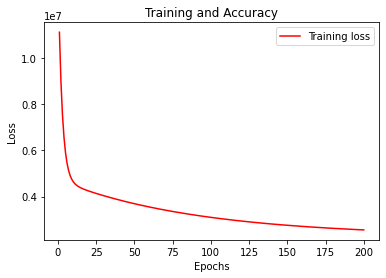

In [79]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss) + 1)            # for x, use len(loss)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
# 학습된 모델을 저장한다.
model.save('./saved.ckpt')
print("학습된 모델을 저장했습니다.")

학습된 모델을 저장했습니다.


## 참고자료

1. 선형회귀 위키백과(https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)
1. 안경잡이개발자  
https://ndb796.tistory.com/124
1. 텐서플로우 기본 문법  
https://gdyoon.tistory.com/8  
https://gdyoon.tistory.com/5  
https://zetawiki.com/wiki/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_random_normal()